# Numerical solution of ordinary differential equations

Various methods to compute approximations of solutions to ordinary differential equations will be implemented in this notebook, and compared to analytical results, as well as reference numerical methods, in order to fully validate the results.

If the code does not work on your computer, use https://colab.research.google.com/ (although the animation features may not work).

In [1]:
#--- scientific computing part ---
import numpy as np
import math
from scipy.integrate import solve_ivp

#--- for plots ---
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Potential and gradient

We start by implementing the most basic numerical scheme, namely the explicit Euler scheme, for a gradient dynamics in dimension 2. We use the Müller-Brown potential introduced in https://doi.org/10.1007/BF00547608
$$
V(x_1,x_2) = \sum_{i=1}^4 A_i \mathrm{e}^{a_i (x_1-x_{i,1}^0)^2 + b_i (x_1-x_{i,1}^0)(x_2-x_{i,2}^0) + c_i (x_2 -x_{i,2}^0)^2},
$$
and considered in various works in physics (up to some modifications), for instance https://pubs.acs.org/doi/full/10.1021/acs.jctc.2c00314

In [2]:
A = [-200.,-100.,-170.,15.]
a = [-1.,-1.,-6.5,0.7]
b = [0.,0,11.,0.6]
c = [-10.,-10.,-6.5,0.7]
x1ref = [1.,0,-0.5,-1.]
x2ref = [0.,0.5,1.5,1.]
    
#--- potential energy function ---    
def V(x):
    val = 0.
    for i in range(0,len(A)):
        arg = a[i]*(x[0]-x1ref[i])**2 
        arg += b[i]*(x[0]-x1ref[i])*(x[1]-x2ref[i]) 
        arg += c[i]*(x[1]-x2ref[i])**2
        val += A[i]*np.exp(arg)
    return val 
    
#--- partial derivative with respect to first coordinate ---
def dV_1(x):
    val = 0.
    # TO COMPLETE
    return val
    
#--- partial derivative with respect to second coordinate ---
def dV_2(x):
    val = 0.
    # TO COMPLETE
    return val
    
#--- gradient of the potential energy function ---
def nabla_V(x):
    return np.array([dV_1(x), dV_2(x)]) #np.column_stack( (dV_1(x), dV_2(x)) )[0]

We plot the potential energy function to have a look at it.

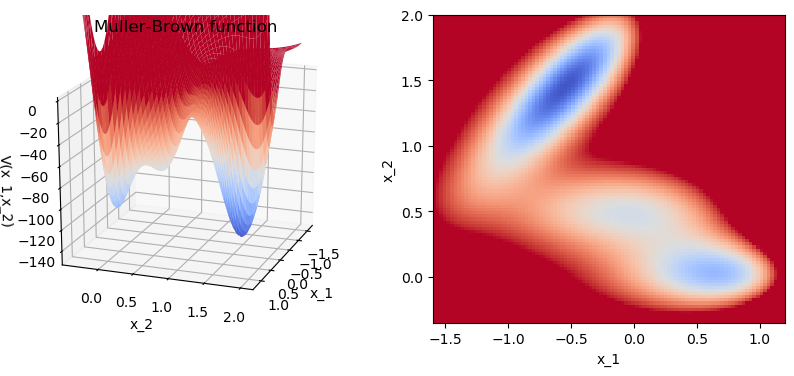

In [3]:
# x and y domains for the plots
x_domain = [-1.6, 1.2] 
y_domain = [-0.35, 2] 
pot_min_max = [-150, 0] # bounds on values of the loss for plots 

gridx = np.linspace(x_domain[0], x_domain[1], 100)
gridy = np.linspace(y_domain[0], y_domain[1], 100)
x_plot, y_plot = np.meshgrid(gridx,gridy)
def potential(x,y):
   return V(np.array([x,y]))
pot_on_grid = potential(x_plot,y_plot)

fig = plt.figure(figsize=(10,4))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2)
ax0.set_title("Muller-Brown function")
#--- to fix angles // in colab, otherwise in notebook could rotate using the mouse/touchpad ---
ax0.view_init(elev=20, azim=20) # play on the angles here to change the visualization
ax0.plot_surface(x_plot, y_plot, pot_on_grid ,vmin=pot_min_max[0], vmax=pot_min_max[1], cmap='coolwarm', edgecolor='none')
ax0.set_xlabel("x_1")
ax0.set_ylabel("x_2")
ax0.set_zlabel("V(x_1,x_2)")
ax0.set_zbound(pot_min_max[0], pot_min_max[1])
ax1.pcolormesh(x_plot,y_plot,pot_on_grid,cmap='coolwarm',shading='auto',vmin=pot_min_max[0],vmax=pot_min_max[1])
ax1.set_xlabel("x_1")
ax1.set_ylabel("x_2")
plt.show()

## Explicit Euler scheme

We consider the ordinary differential equation $\dot{X}(t) = - \nabla V(X(t))$, which we numerically integrate with the explicit Euler scheme.

In [ ]:
def f(X):
    return -nabla_V(X)

In [ ]:
def ExplicitEulerScheme(X_0, dt, Nsteps):
    X = X_0
    traj = []
    for i in range(Nsteps):
        X = X + dt*f(X)
        traj.append(X)         
    return np.array(traj)

In [ ]:
dt = 0.0001
Nsteps = 1000
x_0 = np.array([-1,0.5]) # initial condition; check also with [0.,0.]
trajectory = ExplicitEulerScheme(x_0,dt,Nsteps)

We can plot the trajectory and the associated values of the potential.

In [ ]:
fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(1, 2, 1)
colors = np.round(np.linspace(0,100,len(trajectory)))
ax0.pcolormesh(x_plot,y_plot,pot_on_grid,cmap='coolwarm',shading='auto',vmin=pot_min_max[0],vmax=pot_min_max[1])
ax0.scatter(trajectory[:,0], trajectory[:,1],s=5,c=colors,cmap='gray')
ax0.set_title('Evolution of X')
ax1 = fig.add_subplot(1, 2, 2)
pot_values = V(trajectory.T)
ax1.plot(np.linspace(0,len(pot_values),len(pot_values)),pot_values)
ax1.set_title('Evolution of the potential energy')
plt.show()

## Validation on linear dynamics

In order to debug the schemes above, and understand some of their properties, we temporarily consider a linear dynamics $\dot{X} = -KX$ with $K$ some (non)symmetric matrix.

In [6]:
K = np.array([[1,4],[2,3]])

def f(X):
    return -K@X